#### Name: Mansi Mrugen Shah (ws2865)

# **Model 1 from scratch using CNN layers**


### Import required libraries

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from sklearn import preprocessing
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.callbacks import EarlyStopping

print(tf.__version__)

Using TensorFlow backend.


1.15.0


In [0]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# unzip the folder
from zipfile import ZipFile
filename = "drive/My Drive/Colab Notebooks/JF30-1.zip"
with ZipFile(filename, 'r') as zip:
  zip.extractall()
  print("done!")

done!


**Split the training and testing data**

In [0]:
classlabels = open("classlabels.txt", "r")
image = []
label = []

for line in classlabels:
    words = line.split()
    image.append(words[0][:-1])
    label.append(words[1])

df = pd.DataFrame([], columns = ["image", "label"])
df['image'] = image
df['label'] = label
df.tail()

df2 = df.reindex(np.random.permutation(df.index))


In [0]:
df2.shape

(1479, 2)

In [0]:
train_df = df2.head(1190)
test_df = df2.tail(289)

**Train and test data generator**

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(
dataframe=train_df,
x_col = "image",
y_col = "label",
directory="./jpg/",
class_mode = "categorical",
target_size=(128, 128))

Found 1190 validated image filenames belonging to 30 classes.


In [0]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True)

test_generator = test_datagen.flow_from_dataframe(
dataframe=test_df,
x_col = "image",
y_col = "label",
directory="./jpg/",
class_mode = "categorical",
target_size=(128, 128),
shuffle=False)

Found 289 validated image filenames belonging to 30 classes.


**Check the baseline**

In [0]:
print("check the distribution of testing target variable:")
frequency = test_df['label'].value_counts(normalize =True)
print(frequency*100)

# baseline of the model is 5.2%


check the distribution of testing target variable:
5     5.190311
2     5.190311
28    5.190311
6     5.190311
24    4.844291
25    4.498270
13    4.498270
7     4.152249
17    3.806228
22    3.806228
23    3.806228
29    3.806228
16    3.806228
3     3.806228
26    3.460208
27    3.460208
9     3.460208
12    3.460208
18    3.114187
20    2.768166
14    2.768166
19    2.422145
11    2.076125
10    2.076125
4     2.076125
21    2.076125
8     1.730104
15    1.384083
1     1.038062
30    1.038062
Name: label, dtype: float64


**Generate the model**

In [0]:
    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=(128,128,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(64,(3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(16, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(30))
    model.add(Activation('softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
activation_8 (Activation)    (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
activation_9 (Activation)    (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 32)       

**Compile the model**

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

**Fit Model**

In [0]:

history = model.fit_generator(train_generator,
epochs=50,
validation_data=test_generator,
verbose=1)


Epoch 1/50
38/38 [==============================] - 26s 686ms/step - loss: 0.7396 - acc: 0.7416 - val_loss: 0.9299 - val_acc: 0.6817
Epoch 2/50
38/38 [==============================] - 26s 686ms/step - loss: 0.7090 - acc: 0.7561 - val_loss: 0.8216 - val_acc: 0.7093
Epoch 3/50
38/38 [==============================] - 26s 686ms/step - loss: 0.6724 - acc: 0.7638 - val_loss: 0.7353 - val_acc: 0.7336
Epoch 4/50
38/38 [==============================] - 26s 681ms/step - loss: 0.6506 - acc: 0.7628 - val_loss: 0.9050 - val_acc: 0.7059
Epoch 5/50
38/38 [==============================] - 26s 683ms/step - loss: 0.7333 - acc: 0.7429 - val_loss: 0.9469 - val_acc: 0.6886
Epoch 6/50
38/38 [==============================] - 26s 683ms/step - loss: 0.7416 - acc: 0.7472 - val_loss: 0.9056 - val_acc: 0.6886
Epoch 7/50
38/38 [==============================] - 26s 681ms/step - loss: 0.6749 - acc: 0.7678 - val_loss: 0.8710 - val_acc: 0.7024
Epoch 8/50
38/38 [==============================] - 26s 677ms/step - 

**Minimum and maximum model accuracy**

In [0]:
print("Minimum accuracy of Model: ", min(history.history['acc']))
print("Maximum accuracy of Model: ", max(history.history['acc']))

Minimum accuracy of Model:  0.7361344537815127
Maximum accuracy of Model:  0.8512605042016806


**Minimum and maximum validation accuracy**

In [0]:
print("Minimum accuracy of validation: ", min(history.history['val_acc']))
print("Maximum accuracy of validation: ", max(history.history['val_acc']))

Minimum accuracy of validation:  0.6505190311418685
Maximum accuracy of validation:  0.8027681660899654


**Plot Results**

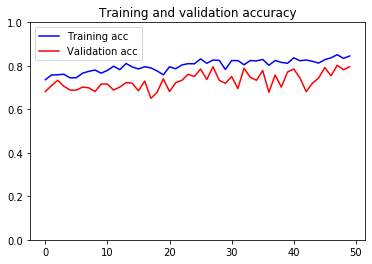

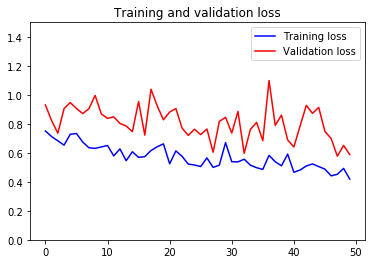

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylim([0,1])
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.ylim([0,1.5])
plt.legend()
plt.show()

10/10 [==============================] - 5s 509ms/step
No of errors = 53/289


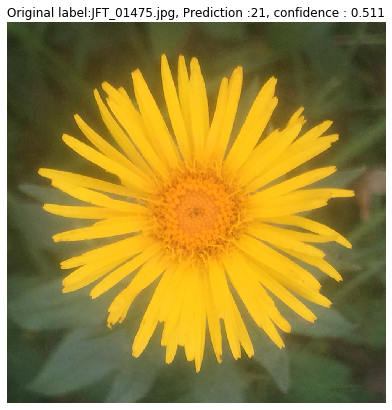

In [0]:
# Get the filenames from the generator

fnames = test_generator.filenames

# Get the ground truth from generator
ground_truth = test_generator.classes

# Get the label to class mapping from the generator

label2index = test_generator.class_indices
# Getting the mapping from class index to class label

idx2label = dict((v,k) for k,v in label2index.items())
# Get the predictions from the model using the generator

predictions = model.predict_generator(test_generator,verbose=1)

predicted_classes = np.argmax(predictions,axis=1)

errors = np.where(predicted_classes != ground_truth)[0]

print("No of errors = {}/{}".format(len(errors),test_generator.samples))

# Show the errors

#for i in range(len(errors)):
pred_class = np.argmax(predictions[errors[0]])
pred_label = idx2label[pred_class]
title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
fnames[errors[0]].split('/')[0],
pred_label,
predictions[errors[0]][pred_class])
original = tf.keras.preprocessing.image.load_img('{}/{}'.format("./jpg/",fnames[errors[0]]))
plt.figure(figsize=[7,7])
plt.axis('off')
plt.title(title)
plt.imshow(original)
plt.show()

**Classification Report**

In [0]:
import sklearn.metrics as metrics
predictions = model.predict_generator(test_generator)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys()) 
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels, zero_division='warn')
print(report)  

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
          10       1.00      1.00      1.00         6
          11       0.75      1.00      0.86         6
          12       0.71      0.50      0.59        10
          13       0.70      0.54      0.61        13
          14       0.70      0.88      0.78         8
          15       0.50      0.25      0.33         4
          16       1.00      0.91      0.95        11
          17       0.82      0.82      0.82        11
          18       0.90      1.00      0.95         9
          19       1.00      0.71      0.83         7
           2       0.78      0.93      0.85        15
          20       0.88      0.88      0.88         8
          21       0.62      0.83      0.71         6
          22       1.00      0.82      0.90        11
          23       0.77      0.91      0.83        11
          24       0.57      0.57      0.57        14
          25       0.93    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Conclusion:**

This is a CNN Classification Model for the Jena Flowers dataset with 30 classes of images. The output activation function is Softmax, loss function is categorical_crossentropy and optimzer is Adam. The baseline of the model is 5.2% and it is calculated using majority classification rule. The model and validation accuracy is exceeding baseline accuracy. The maximum validation accuracy is 80%. 